In [94]:
import pandas as pd
pokemon_data = pd.read_csv('dataset/pokemon.csv')["name"]
words = pokemon_data.to_list() 


In [95]:
words

['Bulbasaur',
 'Ivysaur',
 'Venusaur',
 'Charmander',
 'Charmeleon',
 'Charizard',
 'Squirtle',
 'Wartortle',
 'Blastoise',
 'Caterpie',
 'Metapod',
 'Butterfree',
 'Weedle',
 'Kakuna',
 'Beedrill',
 'Pidgey',
 'Pidgeotto',
 'Pidgeot',
 'Rattata',
 'Raticate',
 'Spearow',
 'Fearow',
 'Ekans',
 'Arbok',
 'Pikachu',
 'Raichu',
 'Sandshrew',
 'Sandslash',
 'Nidoran♀',
 'Nidorina',
 'Nidoqueen',
 'Nidoran♂',
 'Nidorino',
 'Nidoking',
 'Clefairy',
 'Clefable',
 'Vulpix',
 'Ninetales',
 'Jigglypuff',
 'Wigglytuff',
 'Zubat',
 'Golbat',
 'Oddish',
 'Gloom',
 'Vileplume',
 'Paras',
 'Parasect',
 'Venonat',
 'Venomoth',
 'Diglett',
 'Dugtrio',
 'Meowth',
 'Persian',
 'Psyduck',
 'Golduck',
 'Mankey',
 'Primeape',
 'Growlithe',
 'Arcanine',
 'Poliwag',
 'Poliwhirl',
 'Poliwrath',
 'Abra',
 'Kadabra',
 'Alakazam',
 'Machop',
 'Machoke',
 'Machamp',
 'Bellsprout',
 'Weepinbell',
 'Victreebel',
 'Tentacool',
 'Tentacruel',
 'Geodude',
 'Graveler',
 'Golem',
 'Ponyta',
 'Rapidash',
 'Slowpoke',
 'Sl

In [96]:
len(words)

801

In [97]:
min(len(w) for w in words)

3

In [98]:
max(len(w) for w in words)

12

In [99]:
import re
cleaned_words = []
for word in words:
    cleaned_word = re.sub(r'[^a-z]', '', word.lower())  # Keep only a-z
    cleaned_words.append(cleaned_word)

# Ensure that each cleaned word is non-empty (in case some got fully stripped)
cleaned_words = [w for w in cleaned_words if w]


In [100]:
b = {}
for w in cleaned_words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [101]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('e', '<E>'), 119),
 (('<S>', 's'), 111),
 (('a', 'r'), 99),
 (('a', 'n'), 83),
 (('n', '<E>'), 79),
 (('o', 'n'), 77),
 (('l', 'e'), 76),
 (('i', 'n'), 76),
 (('r', 'a'), 75),
 (('a', '<E>'), 74),
 (('r', '<E>'), 68),
 (('<S>', 'm'), 66),
 (('r', 'o'), 66),
 (('<S>', 'c'), 63),
 (('o', 'r'), 62),
 (('e', 'l'), 58),
 (('e', 'r'), 56),
 (('t', '<E>'), 56),
 (('<S>', 'p'), 55),
 (('l', 'i'), 55),
 (('s', '<E>'), 54),
 (('m', 'a'), 52),
 (('l', 'a'), 52),
 (('<S>', 'g'), 51),
 (('r', 'i'), 49),
 (('<S>', 't'), 49),
 (('c', 'h'), 47),
 (('t', 'a'), 46),
 (('<S>', 'd'), 46),
 (('i', 'l'), 45),
 (('o', '<E>'), 45),
 (('<S>', 'b'), 44),
 (('r', 'e'), 44),
 (('u', 'r'), 43),
 (('y', '<E>'), 43),
 (('t', 'o'), 42),
 (('i', 't'), 40),
 (('a', 'l'), 38),
 (('l', 'o'), 38),
 (('o', 'o'), 38),
 (('<S>', 'l'), 38),
 (('l', '<E>'), 37),
 (('n', 'e'), 37),
 (('g', 'o'), 37),
 (('o', 'l'), 37),
 (('e', 'e'), 36),
 (('s', 'h'), 36),
 (('i', 's'), 35),
 (('a', 't'), 35),
 (('d', 'o'), 35),
 (('a', 's')

In [102]:
import torch

In [103]:
N = torch.zeros((27, 27), dtype=torch.int32)
len(N)

27

In [104]:
chars = sorted(list(set(''.join(cleaned_words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
chars

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [105]:
# Bigram counting
for w in cleaned_words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1


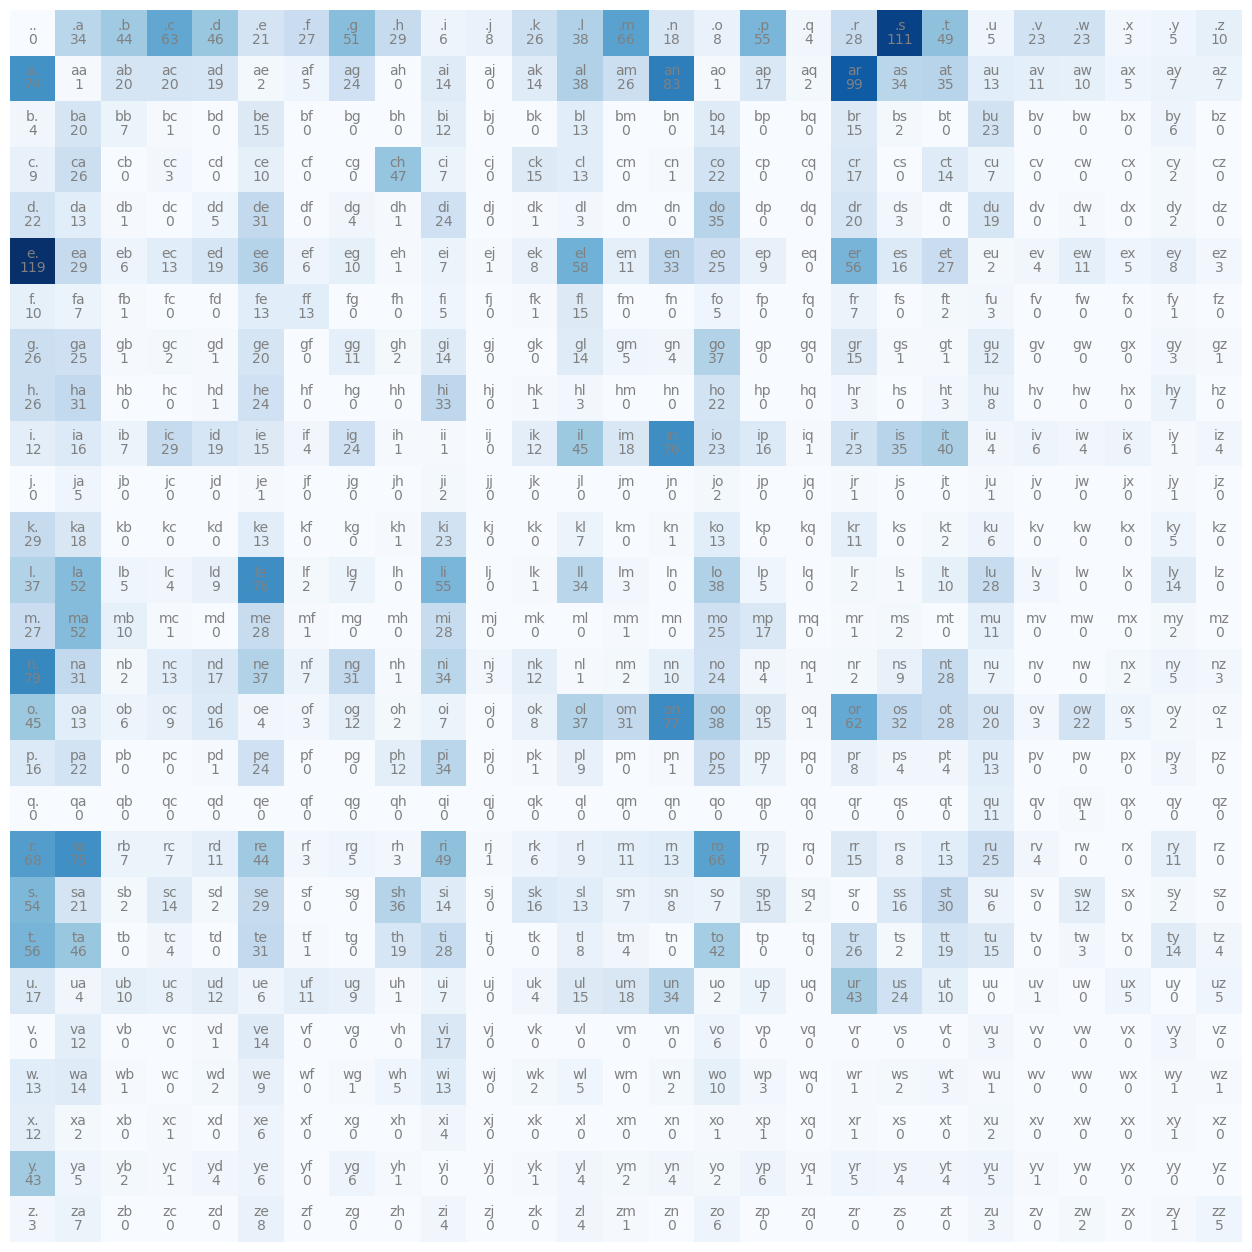

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline

# Adjust the range to match the size of `itos`
size = len(itos)

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')

# Loop over the entire range of unique characters
for i in range(size):
    for j in range(size):
        chstr = itos.get(i, '?') + itos.get(j, '?')  # Use .get() to handle missing keys
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')

plt.axis('off')
plt.show()


In [107]:
N[0]

tensor([  0,  34,  44,  63,  46,  21,  27,  51,  29,   6,   8,  26,  38,  66,
         18,   8,  55,   4,  28, 111,  49,   5,  23,  23,   3,   5,  10],
       dtype=torch.int32)

In [108]:
p = N[0].float()
p = p / p.sum()
p


tensor([0.0000, 0.0424, 0.0549, 0.0787, 0.0574, 0.0262, 0.0337, 0.0637, 0.0362,
        0.0075, 0.0100, 0.0325, 0.0474, 0.0824, 0.0225, 0.0100, 0.0687, 0.0050,
        0.0350, 0.1386, 0.0612, 0.0062, 0.0287, 0.0287, 0.0037, 0.0062, 0.0125])

In [109]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'c'

In [110]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [111]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [112]:
p.shape

torch.Size([3])

In [113]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

In [114]:
P.shape

torch.Size([27, 27])

In [115]:
P.sum(1, keepdim=True).shape

torch.Size([27, 1])

In [116]:
P.sum(1).shape

torch.Size([27])

In [120]:
g = torch.Generator().manual_seed(2147483647)

for i in range(100):
  
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

cexze.
cogllurarochityharellimittarorlgguk.
ka.
dr.
starypubltthimiotos.
molisqckio.
swptedogea.
hakamsede.
enkavirngoftlspihichelavtarlusc.
dsdr.
blewil.
pyaw.
igan.
wip.
dinekezkr.
deru.
fir.
t.
goikanshuabsamal.
kurolqelecranxmearh.
peengxmal.
s.
lm.
havjzeorompsox.
gbptjapaweegphiserikentosillelebhoid.
meenqsam.
hoamaxem.
k.
tswcrfubalcalho.
foronasve.
selaneenechak.
pelodus.
mutatigashougnich.
buwycaro.
arl.
m.
munutetoraror.
bo.
sdunpkarme.
vifacduradisark.
h.
gh.
crdilbarrlrklmpim.
ro.
pnatayd.
vn.
gichosslo.
me.
phiclfxtiriripufff.
zy.
areronerarvipuritooorng.
flkismeamere.
morar.
piegggacalenef.
charuleowteados.
pe.
re.
briox.
se.
ka.
s.
con.
miciswot.
rocansjdideliochediegzzulha.
donosi.
kdr.
flumarotatrmororliltanandike.
sskon.
zorcagata.
cakckiomangpllcins.
uoomenf.
siketaderawigwica.
fecly.
molelp.
lokiee.
proppingin.
cmatoadisho.
douzoom.
ffigede.
djhemilourolteduswkeeaintloontiy.
rdgetifk.
zla.
mus.
ckndsmalisaklyleongeee.
fera.
dr.
dupspdanna.
thavage.
vifffladabraliza.

In [118]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [119]:
log_likelihood = 0.0
n = 0

for w in cleaned_words:
#for w in ["andrejq"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-17734.8867)
nll=tensor(17734.8867)
2.6235039234161377
